# **Lung Cancer Prediction**

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# **Data Info**

In [ ]:
# data shape
print("Data shape:", df.shape)

Data shape: (309, 16)


In [ ]:
# summary info
print("Data summary:")
print(df.info())

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANC

In [ ]:
# Missing data in each column
missing_data = df.isnull().sum()
print("Missing data per column:")
print(missing_data)

# The total amount of missing data in the dataset
total_missing = missing_data.sum()
print("\nTotal missing data in the dataset:", total_missing)

Missing data per column:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Total missing data in the dataset: 0


In [ ]:
# Remove duplicates from dataset
df_no_duplicates = df.drop_duplicates()

# Show dataset shape after removing duplicates
print("Shape of the dataset after removing duplicates:", df_no_duplicates.shape, "\n")

# New summary info
print("Data summary:")
print(df.info())

Shape of the dataset after removing duplicates: (276, 16) 

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  

# **Data Visualisation**

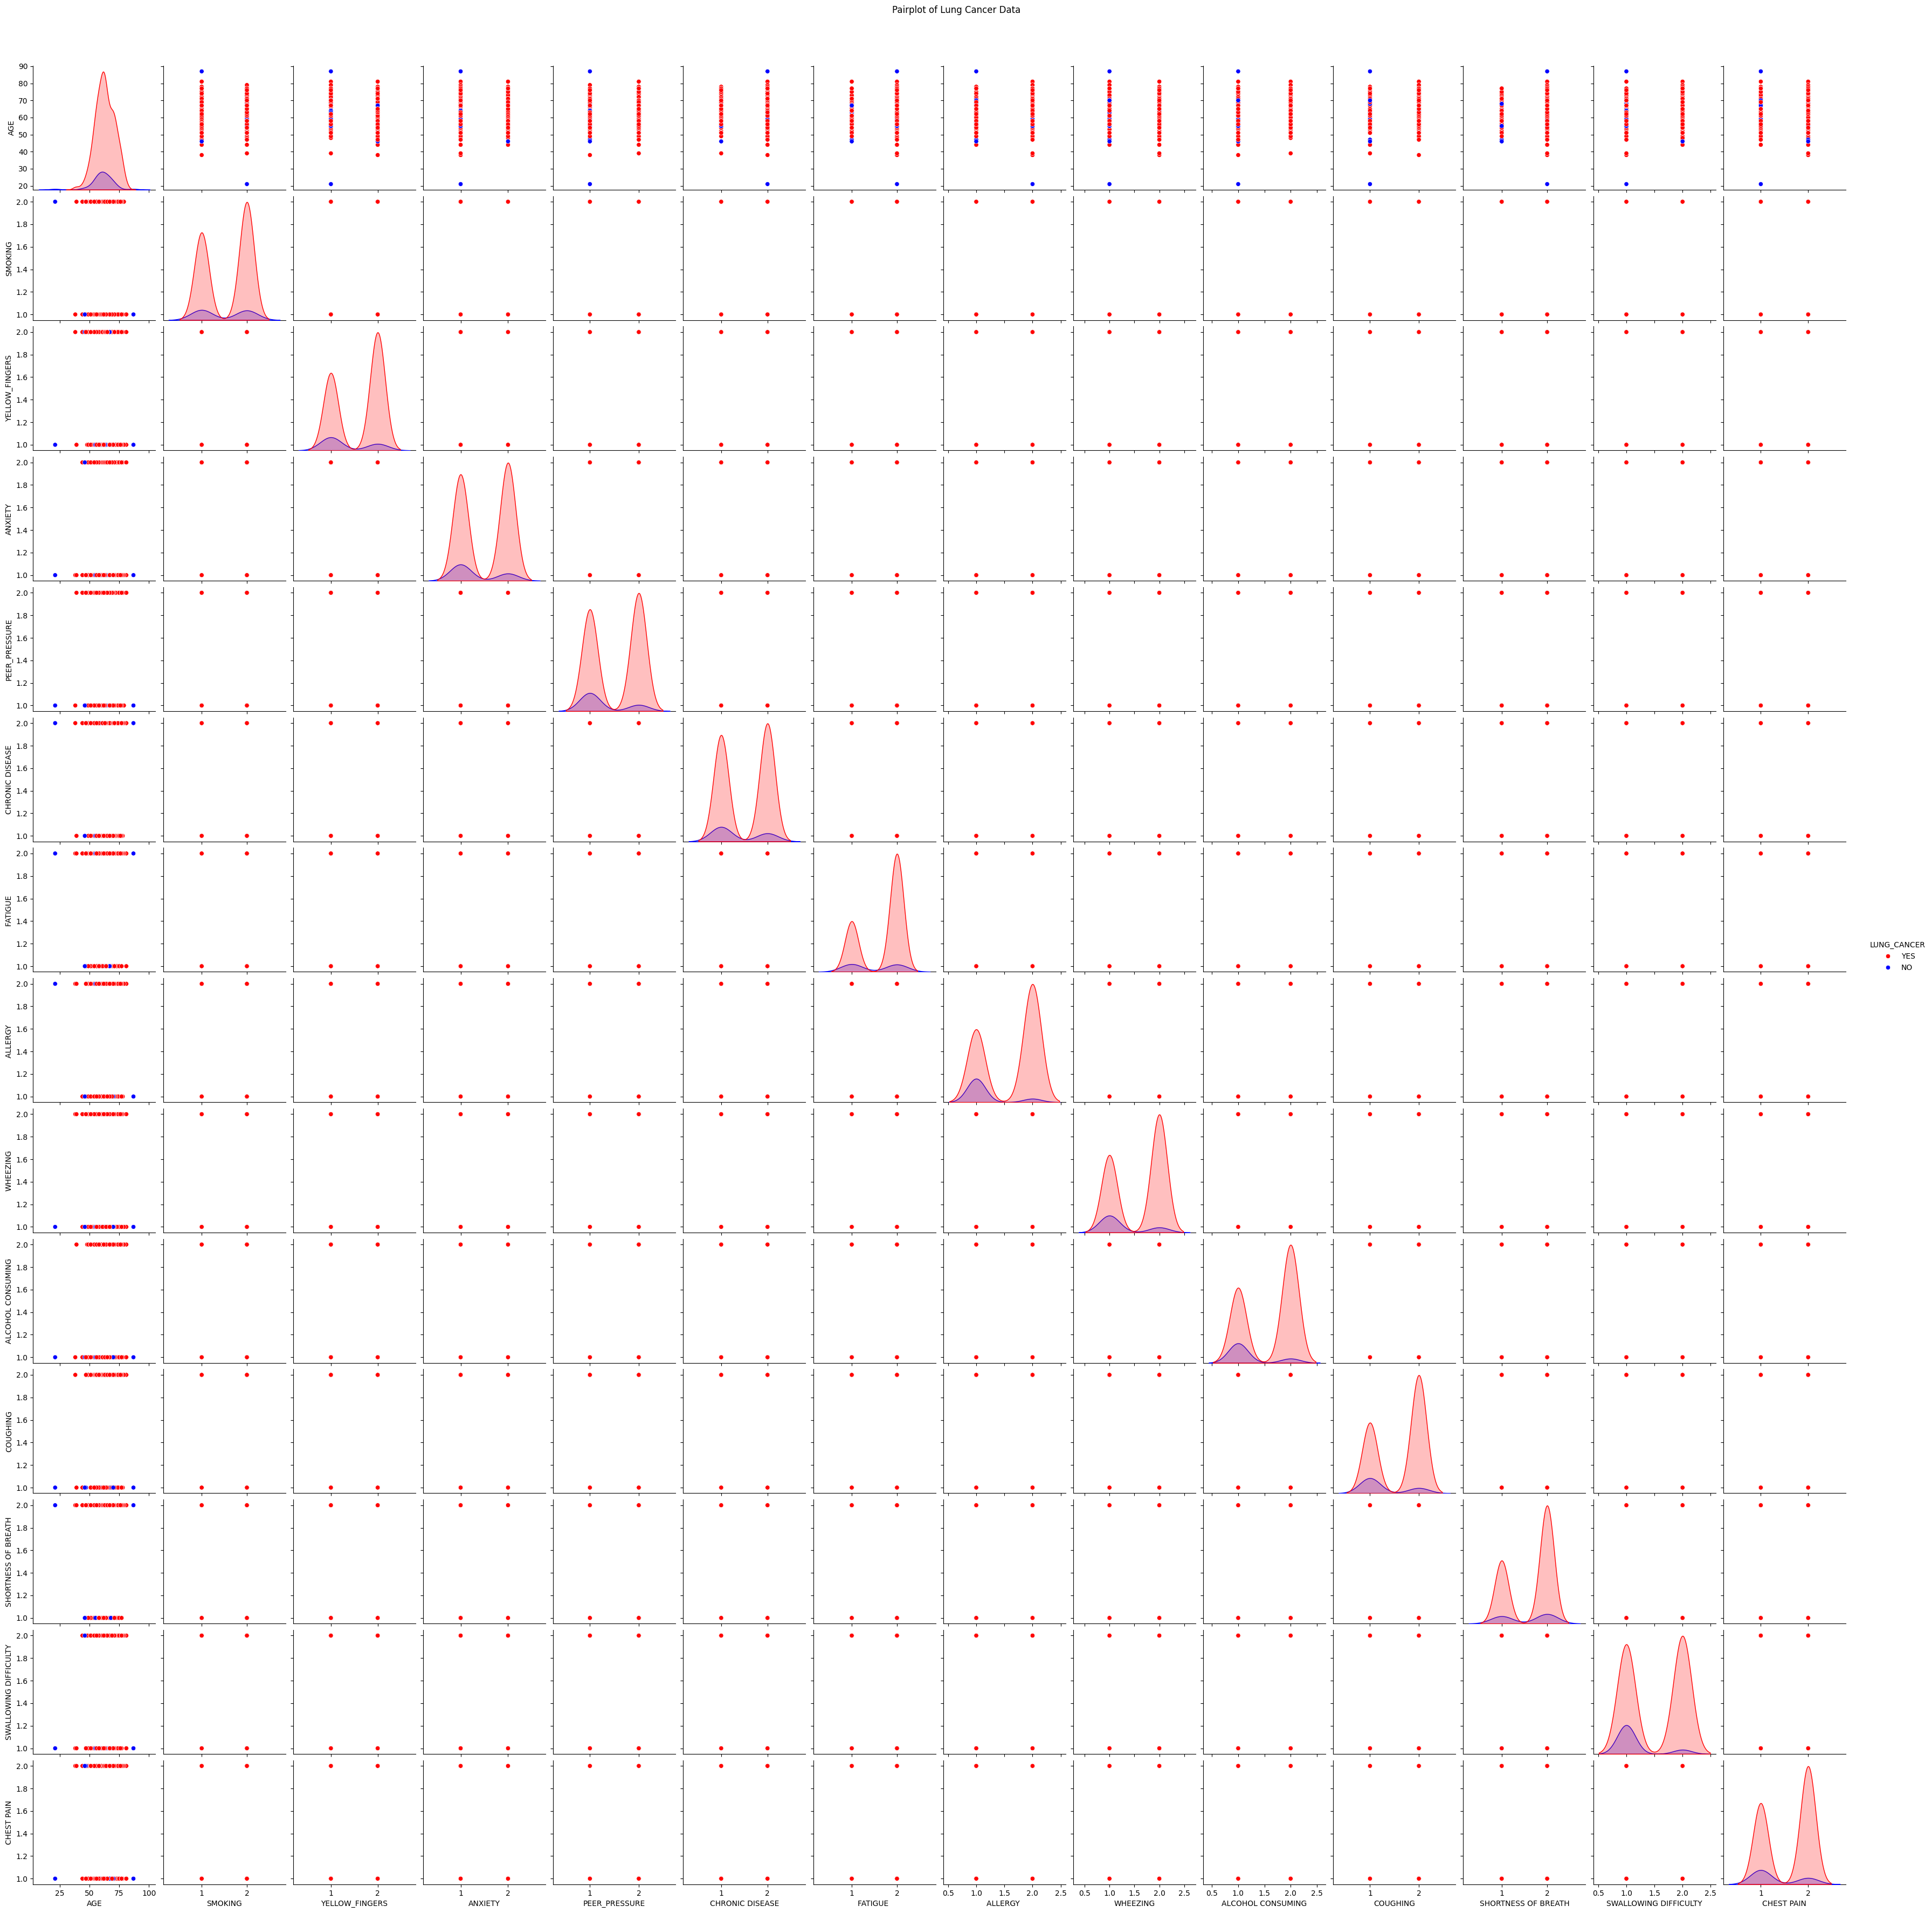

In [ ]:
# pairplot
sns.pairplot(df, hue='LUNG_CANCER', palette={'YES': 'red', 'NO': 'blue'})
plt.suptitle('Pairplot of Lung Cancer Data', y=1.02)
plt.show()

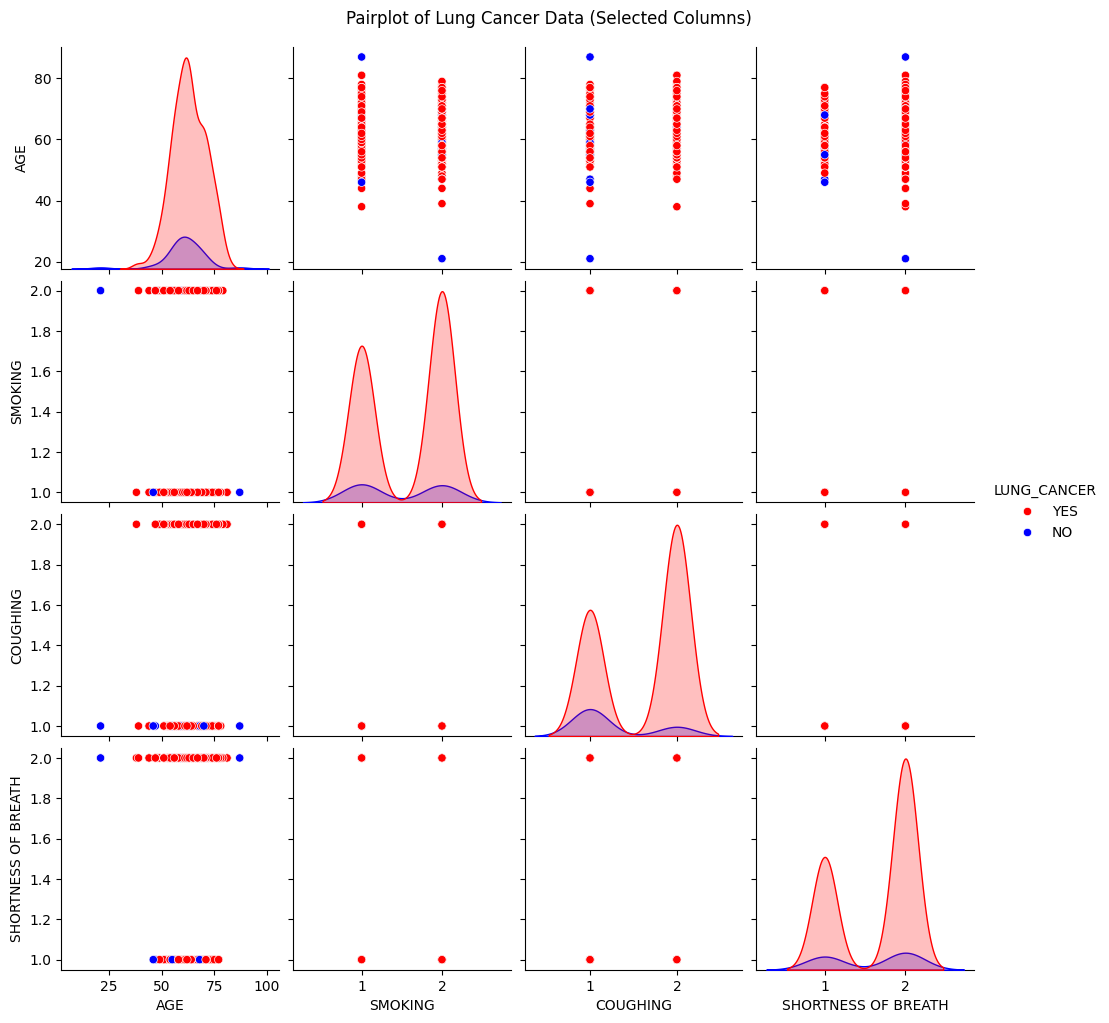

In [ ]:
# Select the 4 columns you want to display in the pair plot
selected_columns = ['AGE', 'SMOKING', 'COUGHING', 'SHORTNESS OF BREATH', 'LUNG_CANCER']
subset_df = df[selected_columns]

# Plot pair plot for 4 columns
sns.pairplot(subset_df, hue='LUNG_CANCER', palette={'YES': 'red', 'NO': 'blue'})
plt.suptitle('Pairplot of Lung Cancer Data (Selected Columns)', y=1.02)
plt.show()

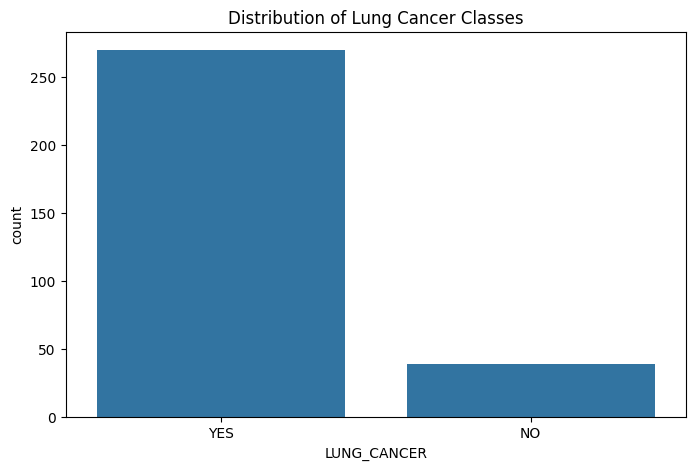

In [ ]:
# Countplot for class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribution of Lung Cancer Classes')
plt.show()

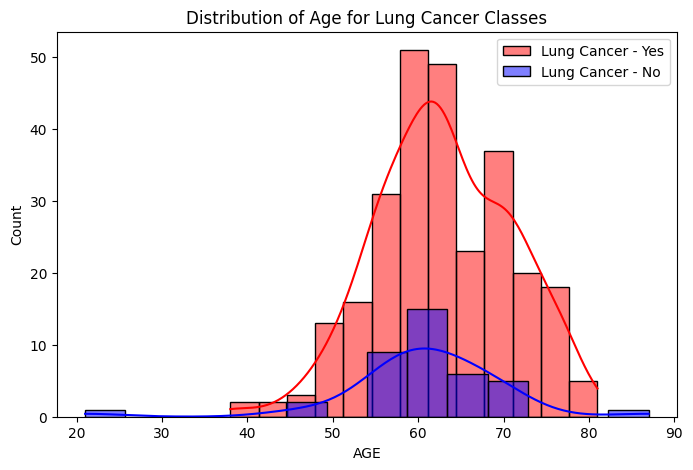

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['LUNG_CANCER'] == 'YES']['AGE'], color='red', label='Lung Cancer - Yes', kde=True)
sns.histplot(df[df['LUNG_CANCER'] == 'NO']['AGE'], color='blue', label='Lung Cancer - No', kde=True)
plt.title('Distribution of Age for Lung Cancer Classes')
plt.legend()
plt.show()

# **Model Building**

In [ ]:
# Select the features that will be used for predictions
features = df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
               'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'CHRONIC DISEASE', 'WHEEZING']]
target = df['LUNG_CANCER']

# Separate data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalization of training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Normalize test data using the mean and std of the training data
X_test_scaled = scaler.transform(X_test)

# Initialize K-NN model
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model on normalized training data
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# **Making Prediction**   
the value [30, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] is the value for the features age (AGE), smoking (SMOKING), yellow fingers (YELLOW FINGERS), anxiety (ANXIETY), pressure (PEER PRESSURE), coughing (COUGHING), shortness of breath (SHORTNESS OF BREATH), difficulty swallowing (SWALLOWING DIFFICULTY), chest pain (CHEST PAIN), chronic disease (CHRONIC DISEASE), wheezing (WHEEZING). Then, I used a pre-trained K-NN model to predict whether people with those characteristics had lung cancer or not.

YES = CANCER     
NO = NO CANCER

In [ ]:
# New data to predict
new_data_1 = pd.DataFrame([[30, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]], columns=['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                                                                       'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'CHRONIC DISEASE', 'WHEEZING'])
new_data_2 = pd.DataFrame([[50, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]], columns=['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                                                                       'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'CHRONIC DISEASE', 'WHEEZING'])

# Normalize new data using the mean and std of the training data
new_data_1_scaled = scaler.transform(new_data_1)
new_data_2_scaled = scaler.transform(new_data_2)

# Label prediction for new data
prediction_1 = knn_model.predict(new_data_1_scaled)
prediction_2 = knn_model.predict(new_data_2_scaled)

# Label prediction for new data
print("Prediction for the new data 1:", prediction_1[0])
print("Prediction for the new data 2:", prediction_2[0])

# **Evaluating the Model**

In [ ]:
y_pred = knn_model.predict(X_test_scaled)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES']


In [ ]:
print(y_pred.shape)

(62,)


In [ ]:
print("Accuracy on test set: {:.4f}".format(accuracy_score(y_test, knn_model.predict(scaler.transform(X_test)))))

Accuracy on test set: 0.9355


In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred, normalize=True) * 100))

Accuracy: 93.55%


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix visualization with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'confusion_matrix' is not defined

**It means:**         


*   **TN (True Negative):** Number of samples that are truly negative and have been correctly predicted as negative = 1
*   **FP (False Positive):** Number of samples that are actually negative but have been incorrectly predicted as positive = 1

*   **FN (False Negative):** Number of samples that are actually positive but have been incorrectly predicted as negative = 3  
*   **TP (True Positive):** Number of samples that are truly positive and have been correctly predicted as positive = 57







